In [1]:
#Transformaciones de datos
import pandas as pd
import numpy as np

In [2]:
path_data = r"..\data\vic_electricity.csv"
data = pd.read_csv(path_data, parse_dates = ['Time'])
data.shape

(52608, 5)

# Procesamiento

In [3]:
data.isna().sum()

Time           0
Demand         0
Temperature    0
Date           0
Holiday        0
dtype: int64

In [4]:
data.head(5)

,Time,Demand,Temperature,Date,Holiday
0,2011-12-31 13:00:00+00:00,4382.825174,21.40,2012-01-01,True
1,2011-12-31 13:30:00+00:00,4263.365526,21.05,2012-01-01,True
2,2011-12-31 14:00:00+00:00,4048.966046,20.70,2012-01-01,True
3,2011-12-31 14:30:00+00:00,3877.563330,20.55,2012-01-01,True
4,2011-12-31 15:00:00+00:00,4036.229746,20.40,2012-01-01,True


In [5]:
data.dtypes

Time           datetime64[ns, UTC]
Demand                     float64
Temperature                float64
Date                        object
Holiday                       bool
dtype: object

In [6]:
data.columns.tolist()

['Time', 'Demand', 'Temperature', 'Date', 'Holiday']

In [7]:
data.columns = [c.lower() for c in data.columns.tolist()]

data.rename(columns={"time":"date_time"},inplace=True)
data = data.loc[:,['date_time', 'demand', 'temperature', 'holiday']]
data["date"] = data.date_time.dt.date
data["hour"] = data.date_time.dt.hour
data["year"] = data.date_time.dt.year
data["mes"] = data.date_time.dt.month

df = data.set_index("date_time")
df = df.resample("1h").first()
df.head()


,demand,temperature,holiday,date,hour,year,mes
date_time,,,,,,,
2011-12-31 13:00:00+00:00,4382.825174,21.4,True,2011-12-31,13,2011,12
2011-12-31 14:00:00+00:00,4048.966046,20.7,True,2011-12-31,14,2011,12
2011-12-31 15:00:00+00:00,4036.229746,20.4,True,2011-12-31,15,2011,12
2011-12-31 16:00:00+00:00,3694.097664,20.1,True,2011-12-31,16,2011,12
2011-12-31 17:00:00+00:00,3433.035352,19.1,True,2011-12-31,17,2011,12


In [8]:
# df_diaria = df.resample("D")[["demand","temperature"]].agg({"demand":'sum', "temperature":'mean'})


In [9]:
def shift_demand(df,horas_anteriores):
  for horas in range(1,horas_anteriores):
    df[f'demand_lag_{horas}h'] = df.demand.shift(horas, fill_value=0)
  return df

df = shift_demand(df, horas_anteriores=11)
df.head()

,demand,temperature,holiday,date,hour,year,mes,demand_lag_1h,demand_lag_2h,demand_lag_3h,demand_lag_4h,demand_lag_5h,demand_lag_6h,demand_lag_7h,demand_lag_8h,demand_lag_9h,demand_lag_10h
date_time,,,,,,,,,,,,,,,,,
2011-12-31 13:00:00+00:00,4382.825174,21.4,True,2011-12-31,13,2011,12,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2011-12-31 14:00:00+00:00,4048.966046,20.7,True,2011-12-31,14,2011,12,4382.825174,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2011-12-31 15:00:00+00:00,4036.229746,20.4,True,2011-12-31,15,2011,12,4048.966046,4382.825174,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2011-12-31 16:00:00+00:00,3694.097664,20.1,True,2011-12-31,16,2011,12,4036.229746,4048.966046,4382.825174,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2011-12-31 17:00:00+00:00,3433.035352,19.1,True,2011-12-31,17,2011,12,3694.097664,4036.229746,4048.966046,4382.825174,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
def moving_avg(df, horas_mv_avg_list):
    for hora in range(1,horas_mv_avg_list):
        df[f"mv_avg_{hora}"] = df.demand.shift(1, fill_value=0).rolling(hora).agg(['mean'])
    return df

df = moving_avg(df, horas_mv_avg_list=5)

In [11]:
df.dtypes

demand            float64
temperature       float64
holiday              bool
date               object
hour                int32
year                int32
mes                 int32
demand_lag_1h     float64
demand_lag_2h     float64
demand_lag_3h     float64
demand_lag_4h     float64
demand_lag_5h     float64
demand_lag_6h     float64
demand_lag_7h     float64
demand_lag_8h     float64
demand_lag_9h     float64
demand_lag_10h    float64
mv_avg_1          float64
mv_avg_2          float64
mv_avg_3          float64
mv_avg_4          float64
dtype: object

In [12]:
df = df.loc["2012-01-01":]

In [13]:
df.head()

,demand,temperature,holiday,date,hour,year,mes,demand_lag_1h,demand_lag_2h,demand_lag_3h,...,demand_lag_5h,demand_lag_6h,demand_lag_7h,demand_lag_8h,demand_lag_9h,demand_lag_10h,mv_avg_1,mv_avg_2,mv_avg_3,mv_avg_4
date_time,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00+00:00,4599.507418,29.1,True,2012-01-01,0,2012,1,4245.024938,3909.300738,3580.091164,...,3272.106404,3331.343274,3433.035352,3694.097664,4036.229746,4048.966046,4245.024938,4077.162838,3911.472280,3776.210233
2012-01-01 01:00:00+00:00,4938.795740,31.3,True,2012-01-01,1,2012,1,4599.507418,4245.024938,3909.300738,...,3370.424090,3272.106404,3331.343274,3433.035352,3694.097664,4036.229746,4599.507418,4422.266178,4251.277698,4083.481064
2012-01-01 02:00:00+00:00,5211.915476,32.7,True,2012-01-01,2,2012,1,4938.795740,4599.507418,4245.024938,...,3580.091164,3370.424090,3272.106404,3331.343274,3433.035352,3694.097664,4938.795740,4769.151579,4594.442699,4423.157208
2012-01-01 03:00:00+00:00,5436.420076,32.6,True,2012-01-01,3,2012,1,5211.915476,4938.795740,4599.507418,...,3909.300738,3580.091164,3370.424090,3272.106404,3331.343274,3433.035352,5211.915476,5075.355608,4916.739545,4748.810893
2012-01-01 04:00:00+00:00,5641.188556,31.4,True,2012-01-01,4,2012,1,5436.420076,5211.915476,4938.795740,...,4245.024938,3909.300738,3580.091164,3370.424090,3272.106404,3331.343274,5436.420076,5324.167776,5195.710431,5046.659677


In [14]:
def pre_model_processing(df):
    df2 = df.copy()
    holiday = np.where(df2["holiday"]== True,1,0)
    df2["holiday_num"] = holiday
    
    new_columns = [c for c in df.columns.tolist() if c not in ["date", "holiday"]]
    return df2[new_columns]

df_model = pre_model_processing(df)

In [22]:
df_model

,demand,temperature,hour,year,mes,demand_lag_1h,demand_lag_2h,demand_lag_3h,demand_lag_4h,demand_lag_5h,demand_lag_6h,demand_lag_7h,demand_lag_8h,demand_lag_9h,demand_lag_10h,mv_avg_1,mv_avg_2,mv_avg_3,mv_avg_4
date_time,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00+00:00,4599.507418,29.1,0,2012,1,4245.024938,3909.300738,3580.091164,3370.424090,3272.106404,3331.343274,3433.035352,3694.097664,4036.229746,4048.966046,4245.024938,4077.162838,3911.472280,3776.210233
2012-01-01 01:00:00+00:00,4938.795740,31.3,1,2012,1,4599.507418,4245.024938,3909.300738,3580.091164,3370.424090,3272.106404,3331.343274,3433.035352,3694.097664,4036.229746,4599.507418,4422.266178,4251.277698,4083.481064
2012-01-01 02:00:00+00:00,5211.915476,32.7,2,2012,1,4938.795740,4599.507418,4245.024938,3909.300738,3580.091164,3370.424090,3272.106404,3331.343274,3433.035352,3694.097664,4938.795740,4769.151579,4594.442699,4423.157208
2012-01-01 03:00:00+00:00,5436.420076,32.6,3,2012,1,5211.915476,4938.795740,4599.507418,4245.024938,3909.300738,3580.091164,3370.424090,3272.106404,3331.343274,3433.035352,5211.915476,5075.355608,4916.739545,4748.810893
2012-01-01 04:00:00+00:00,5641.188556,31.4,4,2012,1,5436.420076,5211.915476,4938.795740,4599.507418,4245.024938,3909.300738,3580.091164,3370.424090,3272.106404,3331.343274,5436.420076,5324.167776,5195.710431,5046.659677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 08:00:00+00:00,4125.988252,22.3,8,2014,12,4302.290352,4366.630872,4196.078900,4060.025416,4004.250250,3987.102930,4023.683826,4067.495722,4071.800790,4052.179286,4302.290352,4334.460612,4288.333375,4231.256385
2014-12-31 09:00:00+00:00,3924.593434,20.3,9,2014,12,4125.988252,4302.290352,4366.630872,4196.078900,4060.025416,4004.250250,3987.102930,4023.683826,4067.495722,4071.800790,4125.988252,4214.139302,4264.969825,4247.747094
2014-12-31 10:00:00+00:00,3927.753088,20.3,10,2014,12,3924.593434,4125.988252,4302.290352,4366.630872,4196.078900,4060.025416,4004.250250,3987.102930,4023.683826,4067.495722,3924.593434,4025.290843,4117.624013,4179.875727


# Entrenamiento


In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
df.date.max(),df.date.min()

(datetime.date(2014, 12, 31), datetime.date(2012, 1, 1))

In [23]:
test_data = df_model.loc["2014-07-01":]
train_data = df_model.loc[:"2014-06-30"]

In [19]:
train_data.date.max(),test_data.date.min()

(datetime.date(2014, 6, 30), datetime.date(2014, 7, 1))

In [29]:
Y_train = train_data["demand"]
X_train = train_data.loc[:,~train_data.columns.isin(['demand'])]


In [35]:

Y_test = test_data["demand"]

X_test = test_data.loc[:,~test_data.columns.isin(['demand'])]

In [31]:
model = LinearRegression(n_jobs=-1)
model.fit(X_train,Y_train)


LinearRegression(n_jobs=-1)

In [33]:
Y_train.describe()

count    21888.000000
mean      4682.017162
std        888.688444
min       2869.696416
25%       3980.403629
50%       4639.664195
75%       5263.256591
max       9345.004346
Name: demand, dtype: float64

<Axes: >

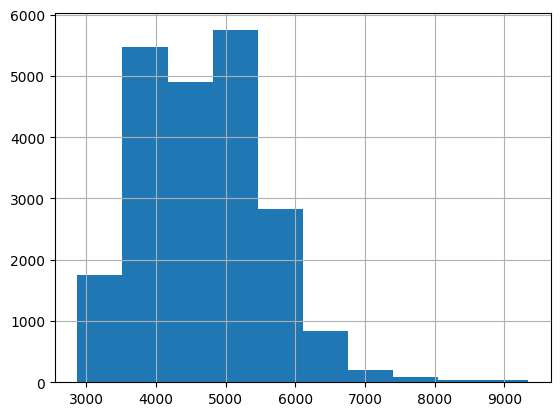

In [34]:
Y_train.hist()

In [40]:
from sklearn.metrics import root_mean_squared_error

y_pred = model.predict(X_test)
rmse = root_mean_squared_error(Y_test, y_pred)
